In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# We want our plots to appear in the notebook
%matplotlib inline 

In [2]:
#Load Data
df = pd.read_csv("data/train.csv") 
df.shape 

(101763, 23)

In [3]:
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [4]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

id :
 [     0      1      2 ... 101760 101761 101762]
0         1
67850     1
67848     1
67847     1
67846     1
         ..
33918     1
33917     1
33916     1
33915     1
101762    1
Name: id, Length: 101763, dtype: int64

 **************************************** 

loc :
 [2.200e+01 1.400e+01 1.100e+01 8.000e+00 2.300e+01 2.400e+01 3.400e+01
 9.000e+00 1.600e+01 1.900e+01 8.300e+01 6.000e+00 6.600e+01 1.260e+02
 7.000e+00 4.000e+01 5.000e+00 4.000e+00 6.300e+01 4.500e+01 3.200e+01
 1.200e+01 1.300e+01 2.100e+01 5.600e+01 5.400e+01 8.000e+01 2.600e+01
 5.100e+01 2.800e+01 3.700e+01 4.200e+01 1.700e+01 9.700e+01 1.000e+01
 7.400e+01 1.500e+01 3.000e+01 6.200e+01 5.700e+01 1.800e+01 3.900e+01
 2.700e+01 4.900e+01 8.800e+01 1.000e+02 8.900e+01 2.000e+01 3.100e+01
 9.500e+01 4.800e+01 4.700e+01 6.400e+01 7.500e+01 1.010e+02 1.370e+02
 2.500e+01 4.100e+01 1.020e+02 3.600e+01 5.000e+01 3.800e+01 8.500e+01
 4.400e+01 1.120e+02 6.500e+01 6.700e+01 5.900e+01 8.400e+01 7.000e+01
 1.080e+02 5.

0.00     7871
3.50     1702
3.00     1406
4.00     1370
2.50     1270
         ... 
22.83       1
11.37       1
30.77       1
36.02       1
17.76       1
Name: d, Length: 3360, dtype: int64

 **************************************** 

i :
 [14.25 21.11 22.76 ... 99.91 74.97 78.81]
0.00      7870
15.63      284
15.86      277
16.14      259
14.34      245
          ... 
35.13        1
39.06        1
58.05        1
119.48       1
78.81        1
Name: i, Length: 5171, dtype: int64

 **************************************** 

e :
 [  5448.79    936.71   1754.01 ... 366391.71  61428.5     732.34]
0.00        7900
225.85       227
213.31       219
174.36       217
1043.09      190
            ... 
39313.75       1
1440.00        1
7904.89        1
8312.50        1
732.34         1
Name: e, Length: 8729, dtype: int64

 **************************************** 

b :
 [9.000e-02 5.000e-02 7.000e-02 3.000e-02 2.000e-02 1.100e-01 1.000e-01
 2.300e-01 8.000e-02 2.900e-01 2.400e-01 0.000e+00 2.700e

C:\Users\USER\AppData\Local\Temp\ipykernel_4576\2507638799.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'loc'}>,
        <Axes: title={'center': 'v(g)'}>,
        <Axes: title={'center': 'ev(g)'}>,
        <Axes: title={'center': 'iv(g)'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>,
        <Axes: title={'center': 'l'}>, <Axes: title={'center': 'd'}>,
        <Axes: title={'center': 'i'}>],
       [<Axes: title={'center': 'e'}>, <Axes: title={'center': 'b'}>,
        <Axes: title={'center': 't'}>,
        <Axes: title={'center': 'lOCode'}>,
        <Axes: title={'center': 'lOComment'}>],
       [<Axes: title={'center': 'lOBlank'}>,
        <Axes: title={'center': 'locCodeAndComment'}>,
        <Axes: title={'center': 'uniq_Op'}>,
        <Axes: title={'center': 'uniq_Opnd'}>,
        <Axes: title={'center': 'total_Op'}>],
       [<Axes: title={'center': 'total_Opnd'}>,
        <Axes: title={'center': 'branchCount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

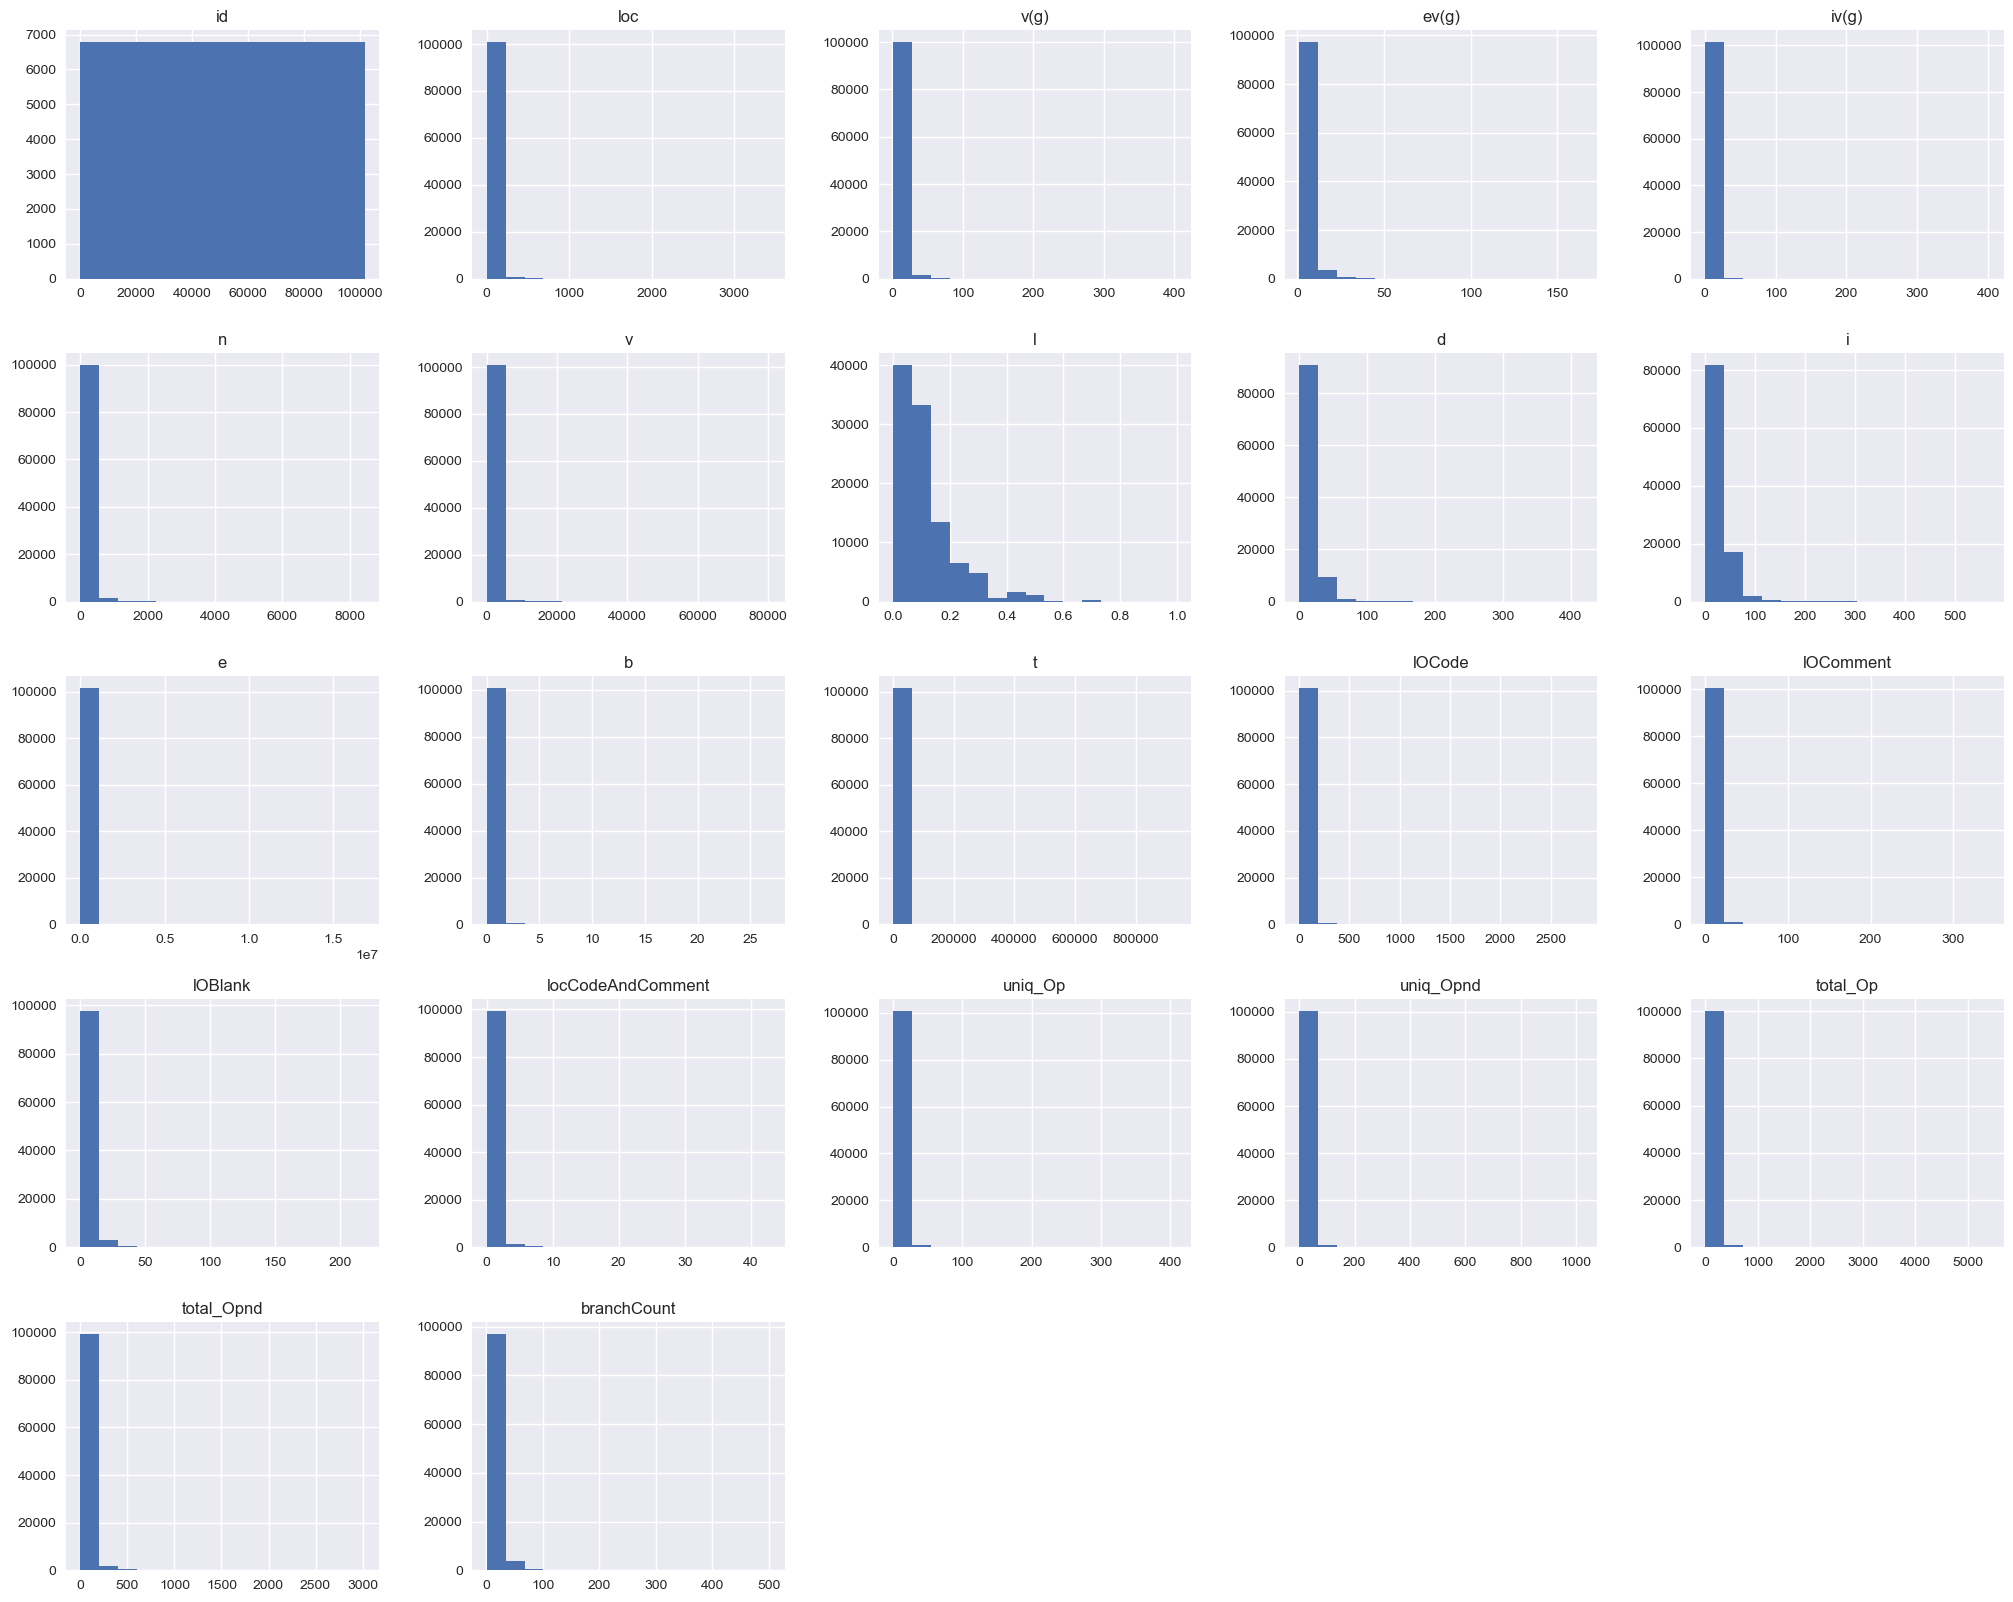

In [5]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), bins=15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [7]:
df.columns

Index(['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
       'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount',
       'defects'],
      dtype='object')

In [8]:
df.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


In [9]:
#Check For Duplicates
duplicates = df.duplicated()

In [10]:
duplicates.sum()

0

In [11]:
# Are there any missing values?
df.isna().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [12]:
df.drop(['id'],axis = 1,inplace = True)

In [13]:
from sklearn.preprocessing import LabelEncoder

Lb = LabelEncoder()

df['defects']  = Lb.fit_transform(df['defects'])

In [14]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0


In [15]:
df['defects'].value_counts()

0    78699
1    23064
Name: defects, dtype: int64

In [16]:
df['defects'].unique() 

array([0, 1], dtype=int64)

In [17]:
df['defects'].value_counts()

0    78699
1    23064
Name: defects, dtype: int64

<Axes: xlabel='defects', ylabel='count'>

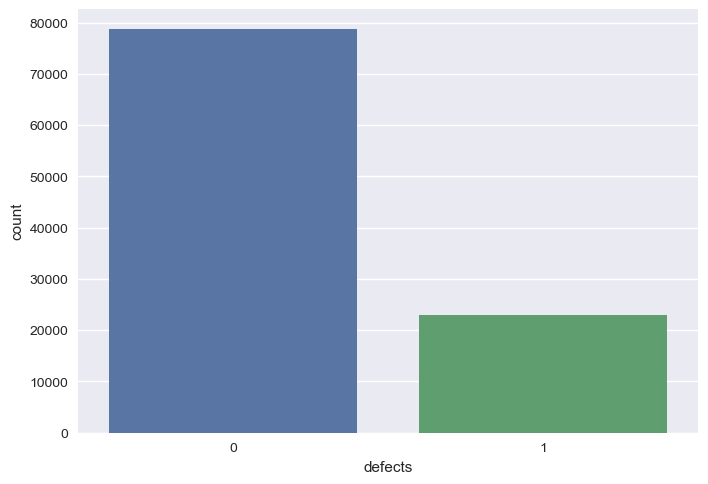

In [18]:
sns.countplot(x="defects", data=df)

<Axes: ylabel='defects'>

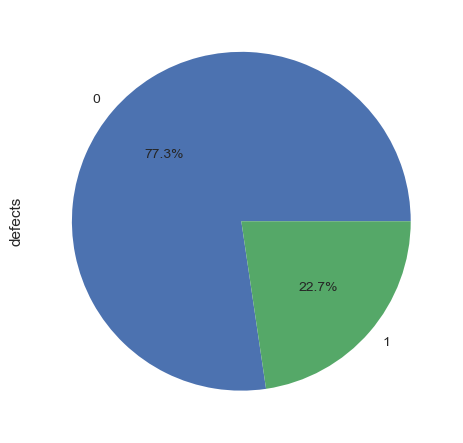

In [19]:
df['defects'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [20]:
## Independent And dependent features
X=df.drop('defects',axis=1)
y=df['defects']

In [21]:
X.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0


In [22]:
y

0         0
1         0
2         0
3         1
4         0
         ..
101758    0
101759    0
101760    0
101761    0
101762    0
Name: defects, Length: 101763, dtype: int64

In [23]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
X_train.shape,X_test.shape

((76322, 21), (25441, 21))

In [25]:
## Feature Selection based on correlaltion
X_train.corr()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
loc,1.000000,0.766877,0.553912,0.687398,0.753702,0.757708,-0.392967,0.586805,0.488150,0.492065,...,0.514884,0.789616,0.534331,0.656032,0.253034,0.368206,0.655242,0.757183,0.753519,0.762226
v(g),0.766877,1.000000,0.723860,0.792066,0.628093,0.637889,-0.386431,0.569449,0.304725,0.437824,...,0.473827,0.643646,0.373198,0.452498,0.208895,0.398952,0.538238,0.647385,0.618074,0.962170
ev(g),0.553912,0.723860,1.000000,0.532258,0.391507,0.384123,-0.324766,0.355535,0.160623,0.300645,...,0.295559,0.388732,0.296334,0.283760,0.165011,0.197135,0.290781,0.401350,0.384805,0.771744
iv(g),0.687398,0.792066,0.532258,1.000000,0.584819,0.601767,-0.286145,0.478828,0.320764,0.380750,...,0.394381,0.648356,0.328306,0.404260,0.173869,0.388410,0.582298,0.594460,0.573310,0.729256
n,0.753702,0.628093,0.391507,0.584819,1.000000,0.951405,-0.305041,0.807470,0.728977,0.595049,...,0.608738,0.916334,0.562506,0.764826,0.266718,0.627998,0.850786,0.964498,0.959395,0.616978
v,0.757708,0.637889,0.384123,0.601767,0.951405,1.000000,-0.268610,0.761477,0.698289,0.581262,...,0.596830,0.909916,0.543337,0.741065,0.256041,0.575202,0.843236,0.954763,0.953594,0.622098
l,-0.392967,-0.386431,-0.324766,-0.286145,-0.305041,-0.268610,1.000000,-0.427140,-0.161213,-0.097195,...,-0.101183,-0.295774,-0.188636,-0.293657,-0.125097,-0.398638,-0.295080,-0.301282,-0.298695,-0.417074
d,0.586805,0.569449,0.355535,0.478828,0.807470,0.761477,-0.427140,1.000000,0.512539,0.474283,...,0.487886,0.772138,0.481795,0.669205,0.269256,0.781582,0.701531,0.809963,0.786679,0.567824
i,0.488150,0.304725,0.160623,0.320764,0.728977,0.698289,-0.161213,0.512539,1.000000,0.295928,...,0.312061,0.686652,0.435359,0.652258,0.215787,0.527932,0.830956,0.709143,0.748973,0.312901
e,0.492065,0.437824,0.300645,0.380750,0.595049,0.581262,-0.097195,0.474283,0.295928,1.000000,...,0.867188,0.575076,0.330198,0.433754,0.137273,0.287877,0.443600,0.575103,0.570688,0.434356


<Axes: >

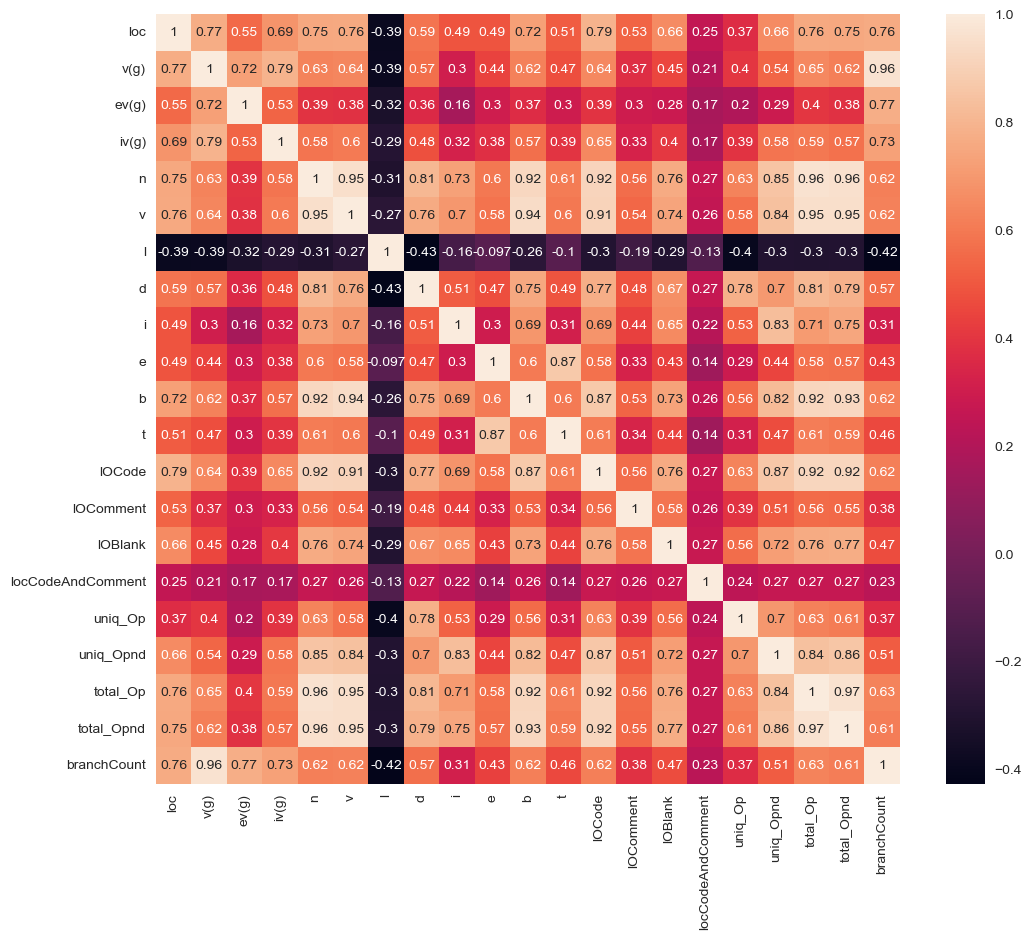

In [26]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [27]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [28]:
correlation(X_train,0.85)

{'b', 'branchCount', 'lOCode', 't', 'total_Op', 'total_Opnd', 'uniq_Opnd', 'v'}

In [29]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [30]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((76322, 13), (25441, 13))

## Feature Scaling Or Standardization

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [32]:
X_train_scaled

array([[ 0.75575851,  0.94200113,  0.88922807, ...,  0.64191064,
        -0.19635318,  2.08193923],
       [-0.50648458, -0.43964639, -0.39630263, ..., -0.47347554,
        -0.19635318, -0.72042807],
       [-0.00529982, -0.18843775, -0.39630263, ..., -0.15479377,
        -0.19635318, -0.13045601],
       ...,
       [-0.39511019, -0.18843775,  0.03220761, ..., -0.15479377,
        -0.19635318, -0.13045601],
       [-0.37654779, -0.43964639, -0.39630263, ..., -0.47347554,
        -0.19635318, -0.42544204],
       [-0.43223499, -0.43964639, -0.39630263, ..., -0.31413465,
        -0.19635318, -0.57293506]])

## Box Plots To understand Effect Of Standard Scaler

C:\Users\USER\AppData\Local\Temp\ipykernel_4576\160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

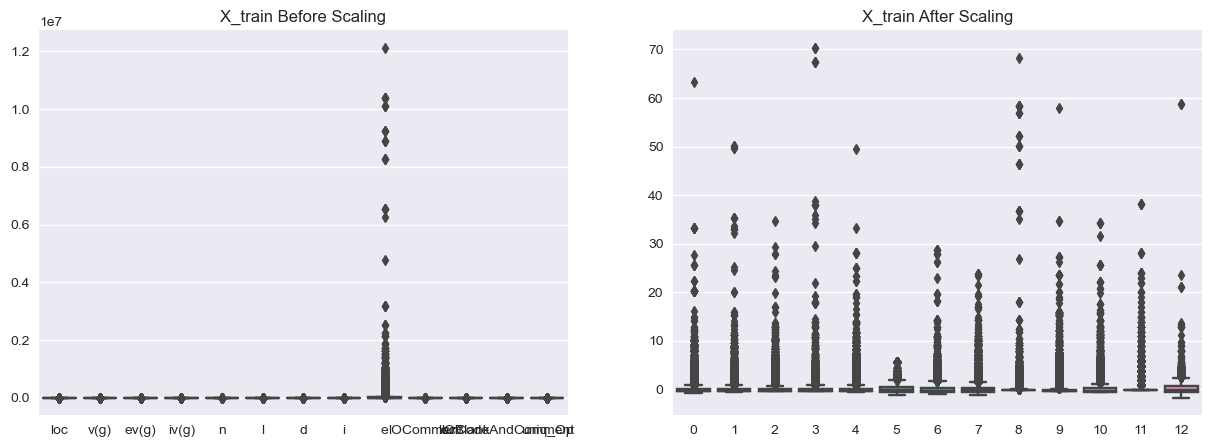

In [33]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

RMSE: 0.3709570095373306
R2 Score 0.21111520725518473


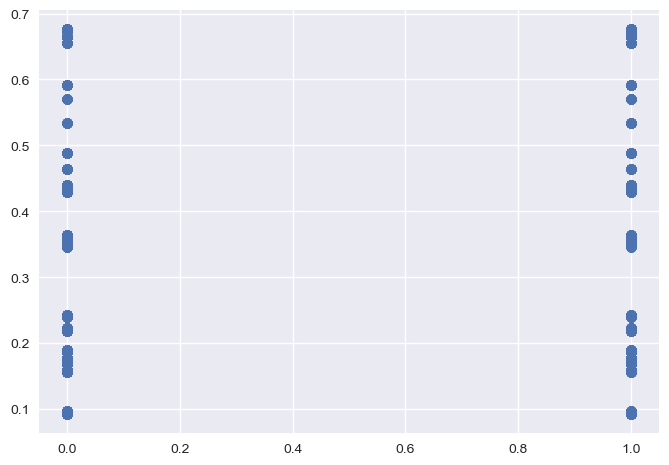

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regr = RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train_scaled,y_train)
y_pred=regr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score=r2_score(y_test,y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print("R2 Score", score)
plt.scatter(y_test,y_pred)